In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

## Loading data:
After importing the necessary libraries, we need now to load our CSV dataset then compare the amount value of both normal and fraudulent transactions:

In [9]:
data = pd.read_csv("creditcard.csv")

print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Here, we import the DecisionTreeClassifier class (to create decision trees), train_test_split (to split the data into training and test sets), the metrics module (to evaluate the model's performance) and matplotlib for visualizing the trees.

## Training the tree model:

We separate the features (predictors) from the data and the target variable that we want to predict. In this case, we assume that the 'Class' column is the target variable, and we separate it from the rest of the data.
We split the data into training and test sets using train_test_split. test_size=0.2 means that 20% of the data will be used for testing, and the rest for training. random_state=42 sets a random seed for reproducibility.
We create a DecisionTreeClassifier object with a maximum depth of 3 (max_depth=3). Then, we train the model on the training data (X_train, y_train) using the fit method.
We use the trained model to make predictions on the test data (X_test) with the predict method. Next, we evaluate the model's accuracy by comparing the predictions (y_pred1) with the true values (y_test) using the accuracy_score metric.

The following steps are similar, but we create a second decision tree with a maximum depth of 5 (max_depth=5), train it, make predictions, and evaluate its accuracy.

In [10]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree1 = DecisionTreeClassifier(max_depth=3)
tree1.fit(X_train, y_train)
y_pred1 = tree1.predict(X_test)
print("First model's precision: ", metrics.accuracy_score(y_test, y_pred1))


tree2 = DecisionTreeClassifier(max_depth=5)
tree2.fit(X_train, y_train)
y_pred2 = tree2.predict(X_test)  
print("Second model's precision:", metrics.accuracy_score(y_test, y_pred2))

Précision du modèle 1: 0.9992802219023208
Précision du modèle 2: 0.9995084442259752


## Visualizing the trees:

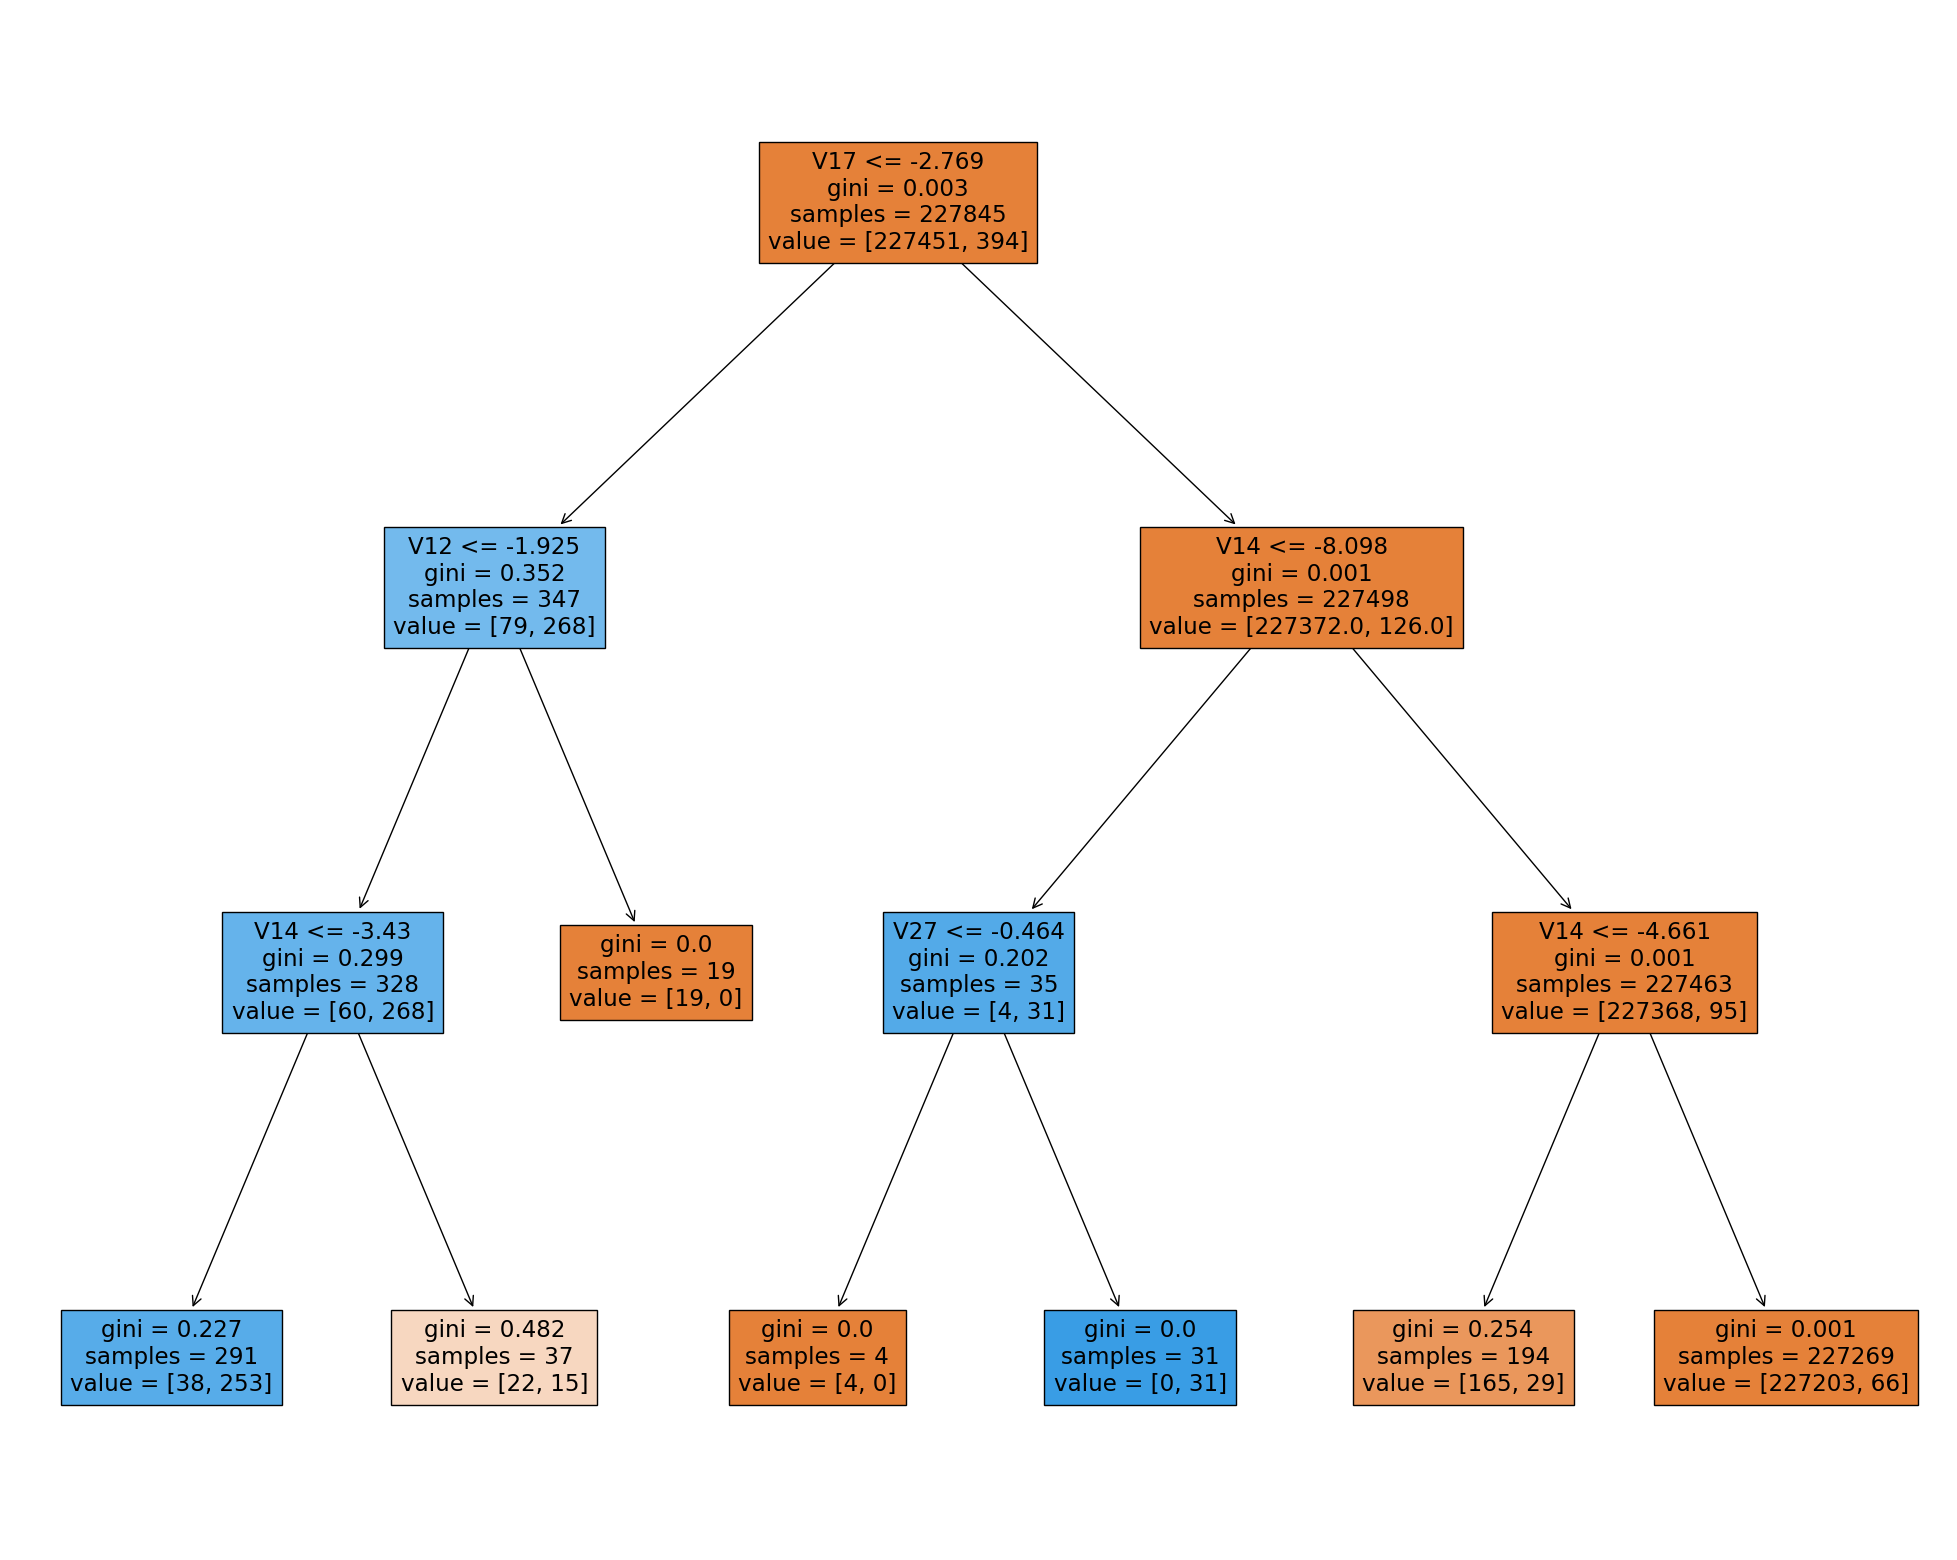

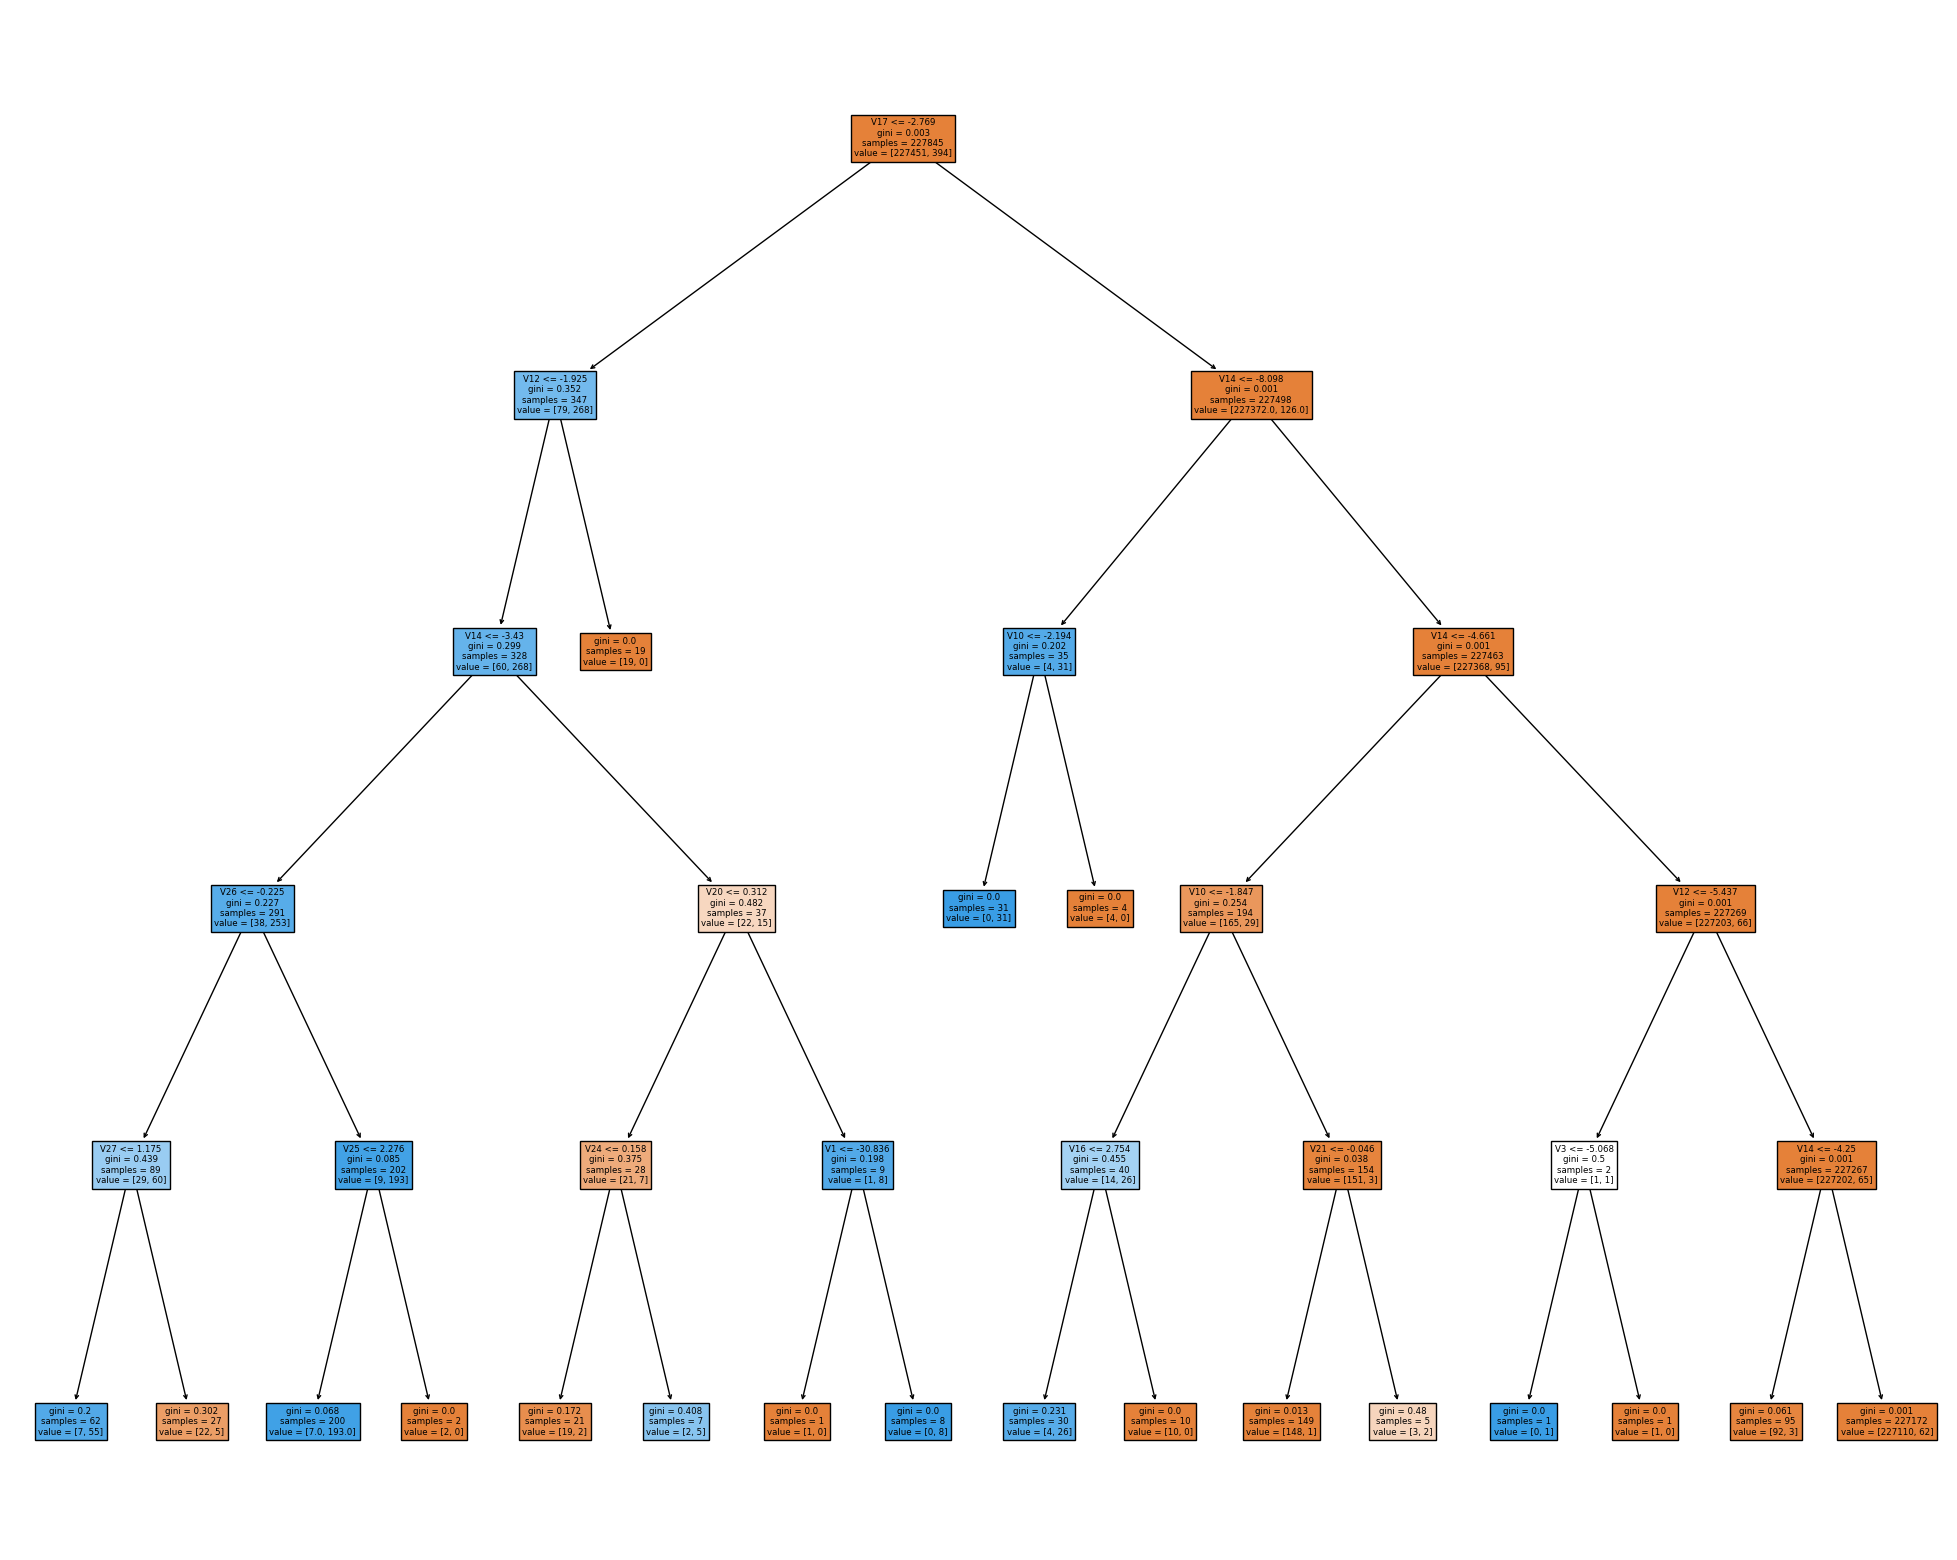

In [11]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree1, feature_names=X.columns, filled=True)
fig.savefig("tree1.png")

fig = plt.figure(figsize=(25,20))  
_ = tree.plot_tree(tree2, feature_names=X.columns, filled=True)
fig.savefig("tree2.png")